In [22]:
import sys
import os

# Add the Code folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Code')))

from CLsimulator import *

In [23]:
# GOS file is too large to be included in the repository, so please download it from the following
# link and copy the path to the GOS file below: https://zenodo.org/records/12800856
path_to_GOS = r'C:\Users\bartv\OneDrive\Documents\AP Master Thesis\Benchmarking Data\data\Dirac_GOS.gosh'
# 'C:\Users\bartv\OneDrive\Documents\AP Master Thesis\Benchmarking Data\data\Dirac_GOS.gosh'

import matplotlib.pyplot as plt
params = {  'file_path' : path_to_GOS,
            'element'   : 'Fe', 
            'shell'     : 'L', 
            'E_0'       : 300e3, # eV
            'beta'      : 10e-3, # mrad
            'seed'      : 111111}

# Create a new CLsimulator object
clsim = SimulateEELSSpectrum(**params)
#initialize the axes of the spectrum
clsim.create_axes(500,3000, 0.1)

array([ 500. ,  500.1,  500.2, ..., 2999.7, 2999.8, 2999.9])

### Vacuum edge intensity
Finding the vacuum intensity requires calculating the differential cross section $\frac{d\sigma}{dE}$, which is proportional to the EELS intensity. This cross section can be calculated with the generalized oscillator strength (GOS), which is the probability of an interaction happening as a function of both the energy lost by the incident electron and the momentum transferred to the bound electron.

The intensity is calculated via the GOS with equation \ref{eq:dcs}

$$
    \frac{d\sigma}{dE} = 4\pi a_0^2 \frac{R^2}{ET} \int^{Q_{max}}_{Q_{min}} \frac{df(q,E)}{dE}d\ln Q
$$

With $a_0 = $\SI{0.529}{\angstrom} the Bohr radius, $R = $\SI{13.6}{\electronvolt}, $E$ the energy loss, $T = \frac{1}{2}m_0v^2$, $Q = (qa_0)^2$ and $\frac{df(q,E)}{dE}$ the Generalized oscillator strength (GOS). The bounds for integration are determined by conservation of momentum for the lower bound and the collection angle for the upper bound. The expressions for the bounds are given below


$$\begin{align*}
    Q_{min} = \frac{E^2}{4RT}\\
    Q_{max} = Q_{min} + 4\gamma^2\frac{T}{R}\sin^2(\beta/2)     
\end{align*}$$

With $\beta$ the collection angle. 

This vacuum intensity assumes collimated incident beam perpendicular to suface. convergens beam yet to be implemented

[np.float64(2.490141735191489e-28), np.float64(825.807953)]
[np.float64(2.5443695576900513e-27), np.float64(714.899571)]
[np.float64(2.68733904940686e-27), np.float64(702.295625)]


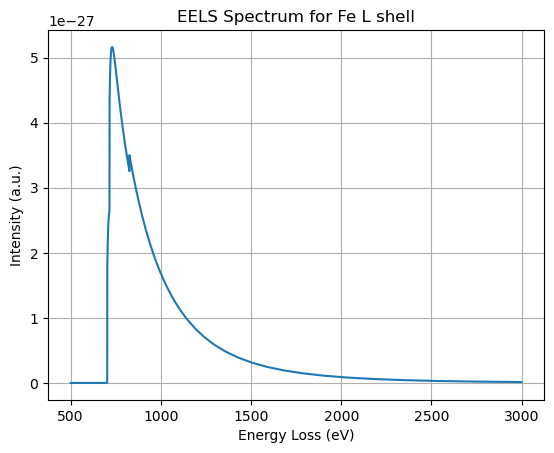

In [24]:
clsim.calculate_all_edges()
clsim.plot_spectrum()

### Low-loss
The low-loss region is composed of a zero-loss peak (ZLP) and multiple plasmon peaks.
ZLP is a normalized lorenzian peak with arbitrary width. 

The differential cross section of the principle plasmon peak is calculated with the equation below.

$$
\frac{d\sigma}{dE} = \frac{1}{\pi a_0 m_e v^2 n_a}\frac{E\cdot \Delta E_p \cdot E_p^2}{(E^2-E_p^2)^2+(E_p\Delta E_p)^2}\ln\left(1+\frac{\beta}{\theta_E}\right)
$$

Where $a_0$ is the Bohr radius, $v$ the speed of the electron, $n_a$ IS ?A CONSTANT?, $E$ is the energy loss of the electron, $E_p$ and $\Delta E_p$ the plasmon peak energy and width, $\beta$ the collection angle and $\theta_E$ the characteristic angle.

To account for multiple plasmon scattering, the principle plasmon peak is shifted $E_p$ for each consecutive scattering. Each consecutive scattering is multiplied with the probability of multiple scattering given by the equation below, with $n$ the number of scatterings, starting with $n=0$ for the plasmon peak 

$$
P_n = \frac{1}{n!}\left(\frac{t}{\lambda}\right)^n\cdot e^{\left(\frac{t}{\lambda}\right)}
$$

This entire low-loss spectrum is then convolved with $I_\text{edge}$ to account for multiple scattering, including ionization of a bound electron.

For the ZLP: the FWHM is chosen between 1 and 3 eV.

For the plasmon peaks: the number of scatterings is chosen between 2 and 5, the plasmon peak width and energy are both chosen between 3 and 20 eV and the scattering parameter $\frac{t}{\lambda}$ is chosen between 0.1 and 1

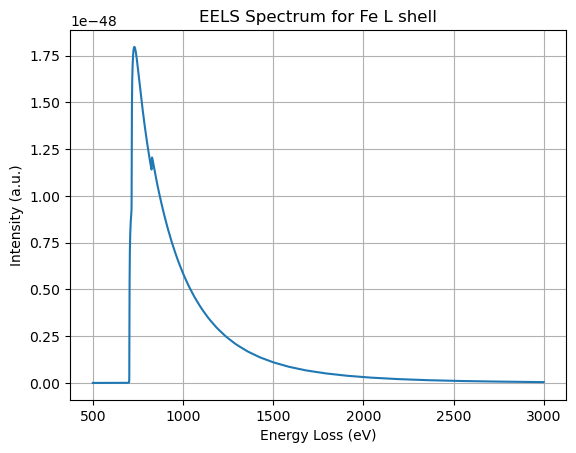

In [25]:
clsim.apply_low_loss()
clsim.plot_spectrum()


### Background
The background is added as a power law $I_\text{background}=A\cdot \left(\frac{E}{E_\text{start}}\right)^{-r}$. With $A$ chosen between $10^3$ and $10^8$, and $r$ chosen between $2$ and $4$ and $E_\text{start}$ the starting energy of the spectrum.

To add the $I_\text{edges}$, a random edge is chosen an is multiplied with a jump ratio between $0.2$ and $1.5$ such that the ratio between the maximum intensity of the chosen edge and the background at that point is the jump ratio.

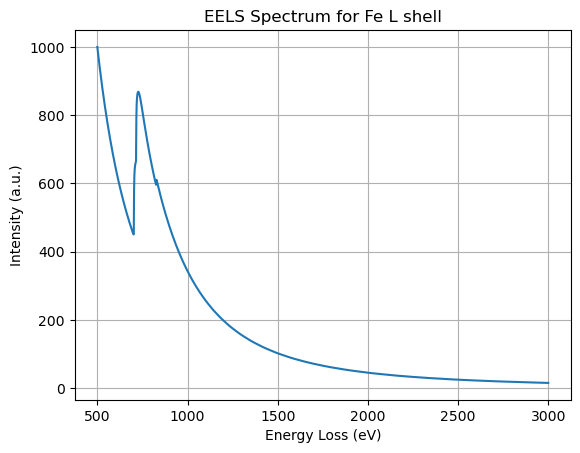

In [26]:
clsim.add_powerlaw_background()
clsim.plot_spectrum()


### Shot noise
Since EELS operates as a counting mechanism, shot noise is added to the spectrum to reflect this. This is achieved by adding a randomly picked value picked from a normal distribution with $\sigma=\sqrt{I(E)}$.

### Systemic Errors
Two different systemic errors are also added to the simulation of the spectra. The first are chemical shifts, shifting the edges individually up to \SI{5}{\electronvolt}. The second error is an instrumental shift, shifting the entire spectrum up to \SI{5}{\electronvolt}

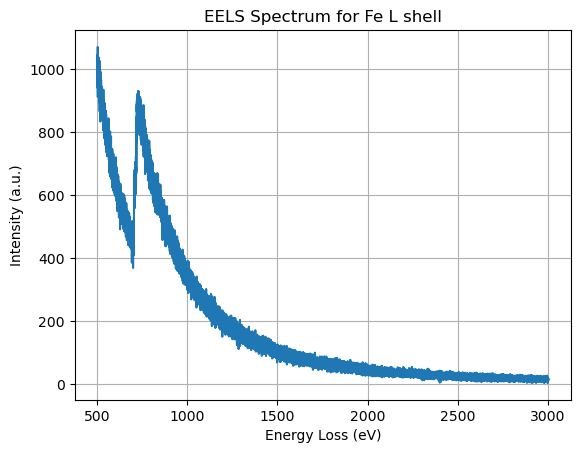

In [27]:
clsim.add_poissonian_noise()
clsim.instrumental_shift()
clsim.plot_spectrum()